In [1]:
# %load example_D_features_comparison.py
from api import Api
from src.utils.plots import (plotModelPredictions, plotModelScores, getPlotColors)
from src.utils.prints import (printModelScores)
import matplotlib.pyplot as plt

colors = getPlotColors()

columnsLists = []
deviationsLists= []
names = []
trainmetrics = []
testmetrics = []

Using TensorFlow backend.


In [2]:
# define dataset specifics
filename = "../master-thesis-db/datasets/D/dataC.csv"

columns = [
	['20TT001', 'Gas side inlet temperature', 'degrees'],
	['20PT001', 'Gas side inlet pressure', 'barG'],
	['20FT001', 'Gas side flow', 'M^3/s'],
	['20TT002', 'Gas side outlet temperature', 'degrees'],
	['20PDT001', 'Gas side pressure difference', 'bar'],
	['50TT001', 'Cooling side inlet temperature', 'degrees'],
	['50PT001', 'Cooling side inlet pressure', 'barG'],
	['50FT001', 'Cooling side flow', 'M^3/s'],
	['50TT002', 'Cooling side outlet temperature', 'degrees'],
	['50PDT001', 'Cooling side pressure differential', 'bar'],
	['50TV001', 'Cooling side valve opening', '%'],
]

traintime = [
		["2020-01-01 00:00:00", "2020-04-01 00:00:00"],
	]

testtime = [
	"2020-01-01 00:00:00",
	"2020-08-01 00:00:00"
]

targetColumns = [
	'50TT002',
]

models = ['A', 'B', 'C']

irrelevantColumnsList = [
	# Model A:
	#  Target: C T out
	#  Featers: P T in, P T out, P flow, C T in 
	[
		'20PT001',
		'20PDT001',
		'50PDT001',
		'50FT001',
		'50TV001',
		'50PT001',
	],
	# Model B:
	#  Target: C T out
	#  Featers: P T in, P T out, P flow, C T in, C P in, C valve
	[
		'20PT001',
		'20PDT001',
		'50PDT001',
		'50FT001',
	],
	# Model C:
	#  Target: C T out
	#  Featers: P T in, P T out, P flow, C T in, C P in, C valve, C flow
	[
		'20PT001',
		'20PDT001',
		'50PDT001',
	],
]

Columns before removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT002 - Cooling side outlet temperature
Col. 9 : 50PDT001 - Cooling side pressure differential
Col. 10 : 50TV001 - Cooling side valve opening

Columns after removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20FT001 - Gas side flow
Col. 2 : 20TT002 - Gas side outlet temperature
Col. 3 : 50TT001 - Cooling side inlet temperature
Col. 4 : 50TT002 - Cooling side outlet temperature

Finding data between 2020-01-01 00:00:00 and 2020-04-01 00:00:00
Found 363 rows

Finding data between 2020-01-01 00:00:00 and 2020-08-01 00:00:00
Found 726 rows

Training model linear A
Model mlp A was loaded from fil

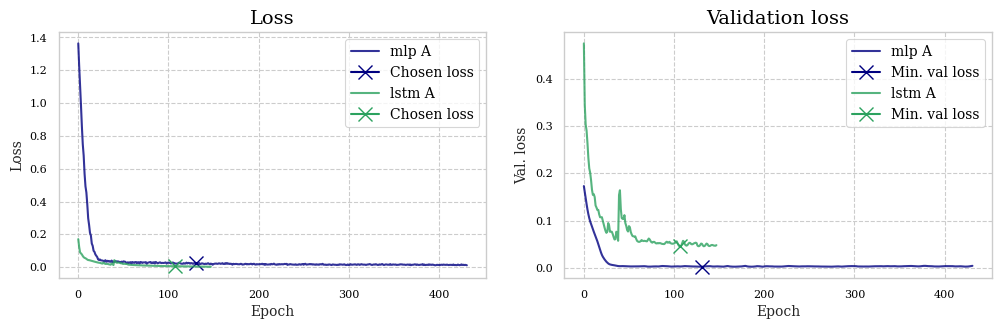

Columns before removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT002 - Cooling side outlet temperature
Col. 9 : 50PDT001 - Cooling side pressure differential
Col. 10 : 50TV001 - Cooling side valve opening

Columns after removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20FT001 - Gas side flow
Col. 2 : 20TT002 - Gas side outlet temperature
Col. 3 : 50TT001 - Cooling side inlet temperature
Col. 4 : 50PT001 - Cooling side inlet pressure
Col. 5 : 50TT002 - Cooling side outlet temperature
Col. 6 : 50TV001 - Cooling side valve opening

Finding data between 2020-01-01 00:00:00 and 2020-04-01 00:00:00
Found 363 rows

Finding data between 2020-01-01 00:00:00 an

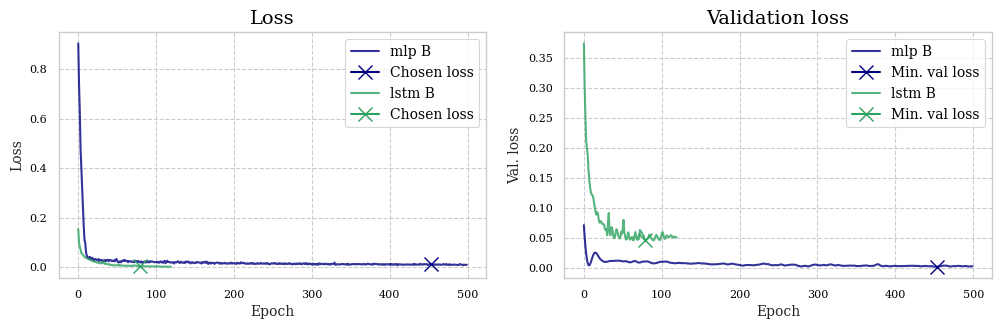

Columns before removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20PT001 - Gas side inlet pressure
Col. 2 : 20FT001 - Gas side flow
Col. 3 : 20TT002 - Gas side outlet temperature
Col. 4 : 20PDT001 - Gas side pressure difference
Col. 5 : 50TT001 - Cooling side inlet temperature
Col. 6 : 50PT001 - Cooling side inlet pressure
Col. 7 : 50FT001 - Cooling side flow
Col. 8 : 50TT002 - Cooling side outlet temperature
Col. 9 : 50PDT001 - Cooling side pressure differential
Col. 10 : 50TV001 - Cooling side valve opening

Columns after removal: 
Col. 0 : 20TT001 - Gas side inlet temperature
Col. 1 : 20FT001 - Gas side flow
Col. 2 : 20TT002 - Gas side outlet temperature
Col. 3 : 50TT001 - Cooling side inlet temperature
Col. 4 : 50PT001 - Cooling side inlet pressure
Col. 5 : 50FT001 - Cooling side flow
Col. 6 : 50TT002 - Cooling side outlet temperature
Col. 7 : 50TV001 - Cooling side valve opening

Finding data between 2020-01-01 00:00:00 and 2020-04-01 00:00:00
Found 363 rows

Findin

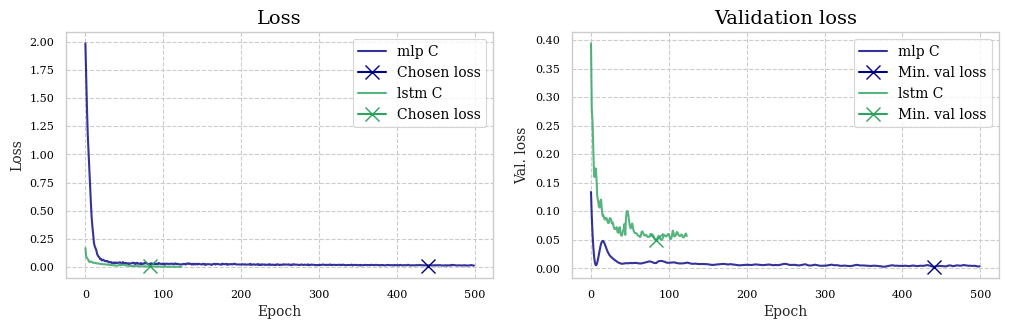

In [3]:
for i, irrelevantColumns in enumerate(irrelevantColumnsList):
    mlApi = Api()
    df = mlApi.initDataframe(filename, columns, irrelevantColumns)
    df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
    X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)
    linear_model = mlApi.Linear_Regularized("linear " + models[i])
    mlp_model = mlApi.MLP("mlp " + models[i], layers=[128], dropout=0.2, epochs=500, verbose=0)
    lstm_model = mlApi.LSTM("lstm " + models[i], layers=[64, 64], dropout=0.2, recurrentDropout=0.2, epochs=250)

    modelList = [
        linear_model,
        mlp_model,
        lstm_model,
    ]

    mlApi.initModels(modelList)
    retrain=False
    mlApi.trainModels(retrain)

    modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(plot=False)

    if i < 1:
        columnsLists = columnsList
        deviationsLists = deviationsList
        all_names = modelNames
        all_train_metrics = metrics_train
        all_test_metrics = metrics_test
    else:
        for j_target in range(len(columnsList)):
            for k_model in range(1, len(columnsList[j_target])):
                columnsLists[j_target].append(columnsList[j_target][k_model])
            for k_model in range(0, len(deviationsList[j_target])):
                deviationsLists[j_target].append(deviationsList[j_target][k_model])
        all_names = [*all_names, *modelNames]
        all_train_metrics = [*all_train_metrics, *metrics_train]
        all_test_metrics = [*all_test_metrics, *metrics_test]


    names.append(modelNames)
    trainmetrics.append(metrics_train)
    testmetrics.append(metrics_test)

Model prediction scores
+----------+-------------+------------+
|  Model   | Train score | Test score |
+----------+-------------+------------+
| linear A |    0.9945   |   0.863    |
|  mlp A   |    0.9972   |   0.8712   |
|  lstm A  |    0.9234   |   0.4977   |
| linear B |    0.9961   |   0.9031   |
|  mlp B   |    0.9983   |   0.9274   |
|  lstm B  |    0.9066   |   0.5091   |
| linear C |    0.9961   |   0.904    |
|  mlp C   |    0.9981   |   0.9516   |
|  lstm C  |    0.9303   |   0.6753   |
+----------+-------------+------------+


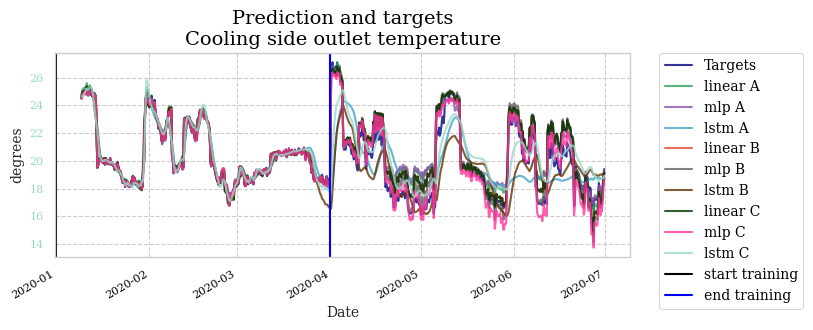

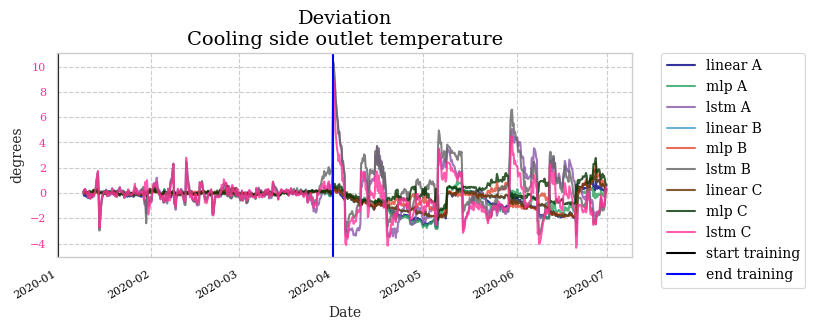

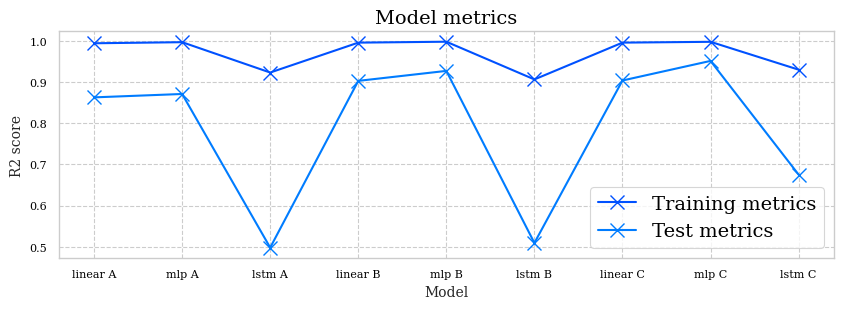

In [4]:
indexColumn = mlApi.indexColumn
columnDescriptions = mlApi.columnDescriptions
columnUnits = mlApi.columnUnits
traintime = mlApi.traintime

for i in range(len(deviationsLists)):
	for j in range(len(deviationsLists[i])):
		deviationsLists[i][j][3] = colors[j]

for i in range(len(columnsLists)):
	for j in range(len(columnsLists[i])):
		columnsLists[i][j][3] = colors[j]

printModelScores(
    all_names,
    all_train_metrics,
    all_test_metrics,
)
plotModelPredictions(
    plt,
    deviationsLists,
    columnsLists,
    indexColumn,
    columnDescriptions,
    columnUnits,
    traintime,
    interpol=False,
)
plotModelScores(
    plt,
    all_names,
    all_train_metrics,
    all_test_metrics,
)